# World happiness report - regression analysis 

I've been learning the theory around statistical analysis and regression analysis, which I wanted to put into (python) practice. I've chosen the 2021 World Happiness dataset available on the Kaggle website. The following sections take you step by step through the approach I've adopted and the code I used to explore the dataset and visualise the insights. 
The analysis concerns particularly around which variables are the most important when measuring the happiness score of a particular country and builds a regression model to predict this score.

World happiness index for 2021


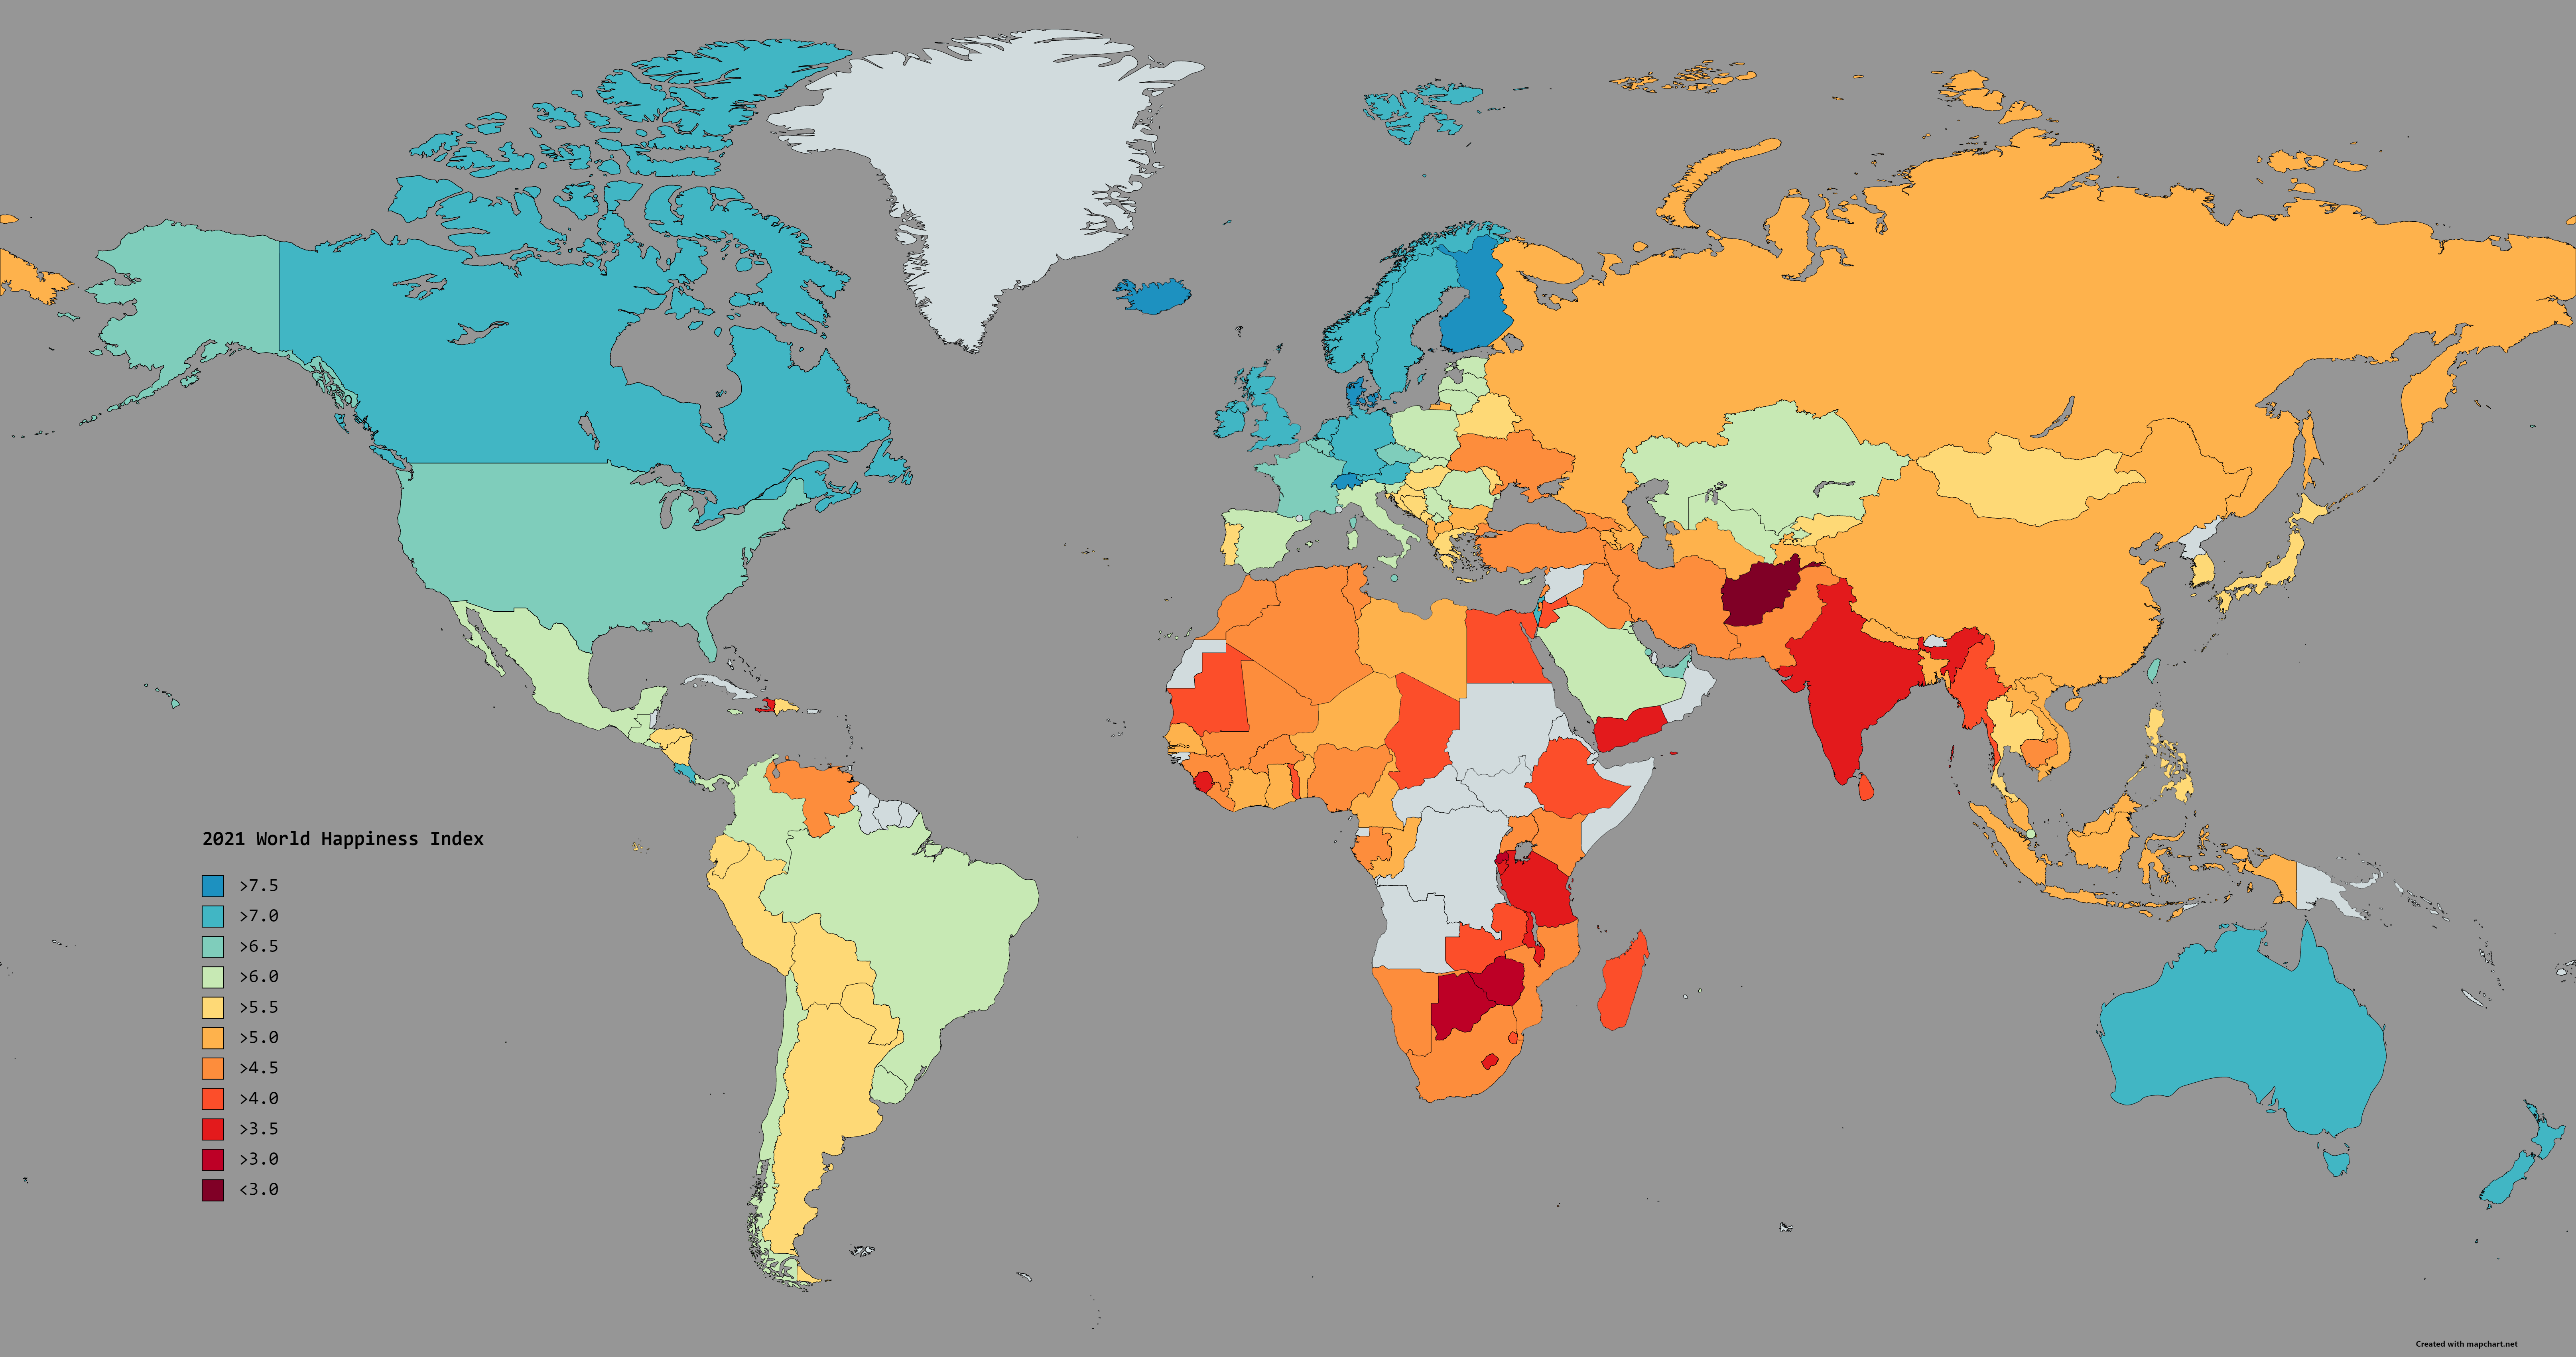

In [70]:
from IPython import display 
print("World happiness index for 2021")
display.Image("https://i.redd.it/xq458pruisi71.png", height=400, width=600)

## Part 1: Reading and inspecting the data

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
#import the world_happiness dataset for 2021
df_2021=pd.read_csv("data/world_happiness_report_2021.csv")

In [3]:
#check the data types and column names
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

Most of data types are floats apart from country name and regional indicator. Additonally, there are no null values, so no need for extra cleaning.

In [4]:
#show the first 5 rows
df_2021.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
#return the number of rows and columns of the dataframe
df_2021.shape

(149, 20)

In [6]:
#calculate a few summary statistics for each column
df_2021.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


We can see substantial differences between the minimum and maximum values for many variables;
    - Ladder Score (2.52 vs 7.84),
    - Social Support (0.46 vs 1.64),
    - Healthy life expectancy (48yrs vs 76yrs), 
    - Freedom to make life choices (0.38 vs 0.97), 
    - Generosity (-0.28 vs 0.54) and 
    - Perception of corruption (0.08 vs 0.93)
    
 In the following section (Part 2), we will explore some of these differences in more detail.

## Part 2: EDA (Expoloratory data analysis)

### 2.1 Exploring, filtering and visualising the data

#### 2.1.1 Regions split

Given this is a world happiness dataset, we can assume the ladder score provides with the rank of how happy the country is. For 2021 is looks like the happiest country is Finland with all the following four countries belonging to Western Europe.

Let's see what other regions we have in the dataset.

In [7]:
#drop duplicates to see how many regions are present in the dataset
regions_list=df_2021["Regional indicator"].drop_duplicates()
print("Number of regions in the dataset:", regions_list.count())

Number of regions in the dataset: 10


#### 2.1.2 Number of countries per region

In [8]:
#list and count how many countries belong to a specific region
countries_per_region=df_2021["Regional indicator"].value_counts()
print("         Number of countries per region:")
print(countries_per_region)

         Number of countries per region:
Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64


Text(0.5, 1.0, 'Number of countries per region')

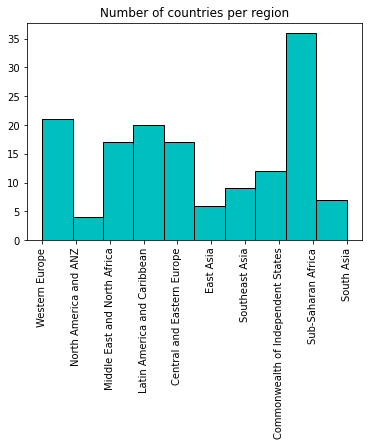

In [9]:
#visualise the the number of countries per region
plt.hist(df_2021["Regional indicator"], color="c", edgecolor="k")
plt.xticks(rotation=90)
plt.title("Number of countries per region")

Sub-Saharan Africa region has the highest number of countries - 36.

#### 2.1.3 Ladder score rankings

In [10]:
#find the happiest 3 countries in Central and Eastern Europe
df_2021[df_2021["Regional indicator"]=="Central and Eastern Europe"].sort_values(by="Ladder score", ascending=False).head(3)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
17,Czech Republic,Central and Eastern Europe,6.965,0.049,7.062,6.868,10.556,0.947,70.807,0.858,-0.208,0.868,2.43,1.370,1.090,0.703,0.580,0.052,0.046,3.124
28,Slovenia,Central and Eastern Europe,6.461,0.043,6.546,6.376,10.529,0.948,71.400,0.949,-0.101,0.806,2.43,1.360,1.093,0.722,0.690,0.122,0.085,2.388
32,Kosovo,Central and Eastern Europe,6.372,0.059,6.487,6.257,9.318,0.821,63.813,0.869,0.257,0.917,2.43,0.937,0.807,0.483,0.593,0.356,0.014,3.182


Czech Republic, Slovenia and Kosovo are the happiest countries in Central and Eastern Europe.

#### 2.1.4 Max vs min scores per region

In [11]:
#take the minimum score from each country and save it as an array
min_region_score=df_2021.groupby("Regional indicator")["Ladder score"].min()

In [12]:
#display the mimumin Ladder scores for each region
min_region_score

Regional indicator
Central and Eastern Europe            5.101
Commonwealth of Independent States    4.875
East Asia                             5.339
Latin America and Caribbean           3.615
Middle East and North Africa          3.658
North America and ANZ                 6.951
South Asia                            2.523
Southeast Asia                        4.426
Sub-Saharan Africa                    3.145
Western Europe                        5.536
Name: Ladder score, dtype: float64

In [13]:
type(min_region_score)

pandas.core.series.Series

In [14]:
regional_scores=pd.DataFrame(min_region_score)

In [15]:
#take the maximum score from each country and save it as an array
max_region_score=df_2021.groupby("Regional indicator")["Ladder score"].max()
#max_region_score=pd.DataFrame()
#print(max_region_score)

In [16]:
max_region_score

Regional indicator
Central and Eastern Europe            6.965
Commonwealth of Independent States    6.179
East Asia                             6.584
Latin America and Caribbean           7.069
Middle East and North Africa          7.157
North America and ANZ                 7.277
South Asia                            5.269
Southeast Asia                        6.377
Sub-Saharan Africa                    6.049
Western Europe                        7.842
Name: Ladder score, dtype: float64

In [17]:
regional_scores=df_2021.groupby(df_2021["Regional indicator"])["Ladder score"].agg([max, min])

#### 2.1.5 Happiest countries per region

In [18]:
df_2021.groupby(["Regional indicator"])[["Country name", "Ladder score"]].max()

,Country name,Ladder score
Regional indicator,,
Central and Eastern Europe,Slovenia,6.965
Commonwealth of Independent States,Uzbekistan,6.179
East Asia,Taiwan Province of China,6.584
Latin America and Caribbean,Venezuela,7.069
Middle East and North Africa,Yemen,7.157
North America and ANZ,United States,7.277
South Asia,Sri Lanka,5.269
Southeast Asia,Vietnam,6.377
Sub-Saharan Africa,Zimbabwe,6.049


We've looked at some specific regions, their countries and it seems like there are relatively large difference across the world. To see the whole spectrum of differences, let's move to distributions.

### 2.2 Distributions

#### 2.2.1 Distribution of the Ladder score

<AxesSubplot:xlabel='Ladder score', ylabel='Probability'>

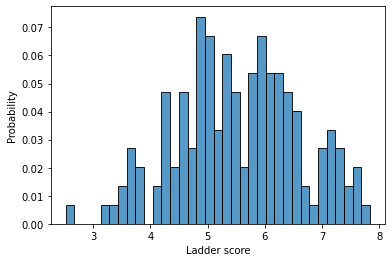

In [19]:
#create a histogram for the Ladder score
ladder_score=df_2021["Ladder score"]
sns.histplot(ladder_score, stat="probability", bins=35)

The distribution looks fairly normal. To explore the spread of the data, we'll use the boxplots. This will display first and third quartile, minimum and maximum and mean values for specific variables.

#### 2.2.2 Boxplots for the ladder scores per region

Text(0.5, 1.0, '')

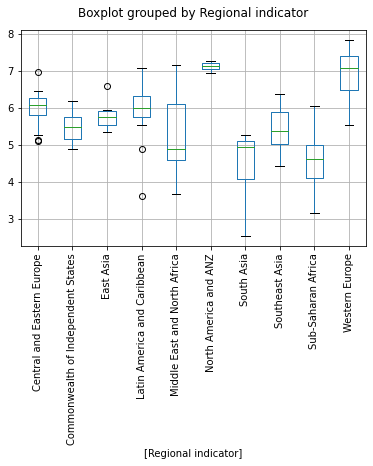

In [20]:
df_2021.boxplot(column=["Ladder score"], by=["Regional indicator"])
plt.xticks(rotation=90)
plt.title("")

What is interesting is that we see mostly Western Countries in the list of top 10 happiest countries, however, when we look at the mean Ladder scores for the region, we can see that the mean of Western Europe is 6.91 while the mean for North America and ANZ is 8.12 point. 
The answer probably lies in the fact that there are only 4 countries with a very high score in the North America ANZ region, pushing the overall mean up, while Western Europe hold 21 countries where some may pull it down, leading to a lower overall score.

Bearing in mind the mean for the ladder score is 5.5, most of African and Asian countries fall under the mean. The only exeption is East Asia, where it's shifted towards 6.
North America and ANZ seem to have the highest mean with the lowest spread. Let's see what countries belong to the latter regions.

In [21]:
#check what countries belong to the North America and ANZ and East Asia
na_anz=df_2021[df_2021["Regional indicator"]=="North America and ANZ"]
east_asia=df_2021[df_2021["Regional indicator"]=="East Asia"]
print("The countries that belong to North America and ANZ region are:",na_anz["Country name"].to_list())
print("The countries that belong to East Asia region are:",east_asia["Country name"].to_list())

The countries that belong to North America and ANZ region are: ['New Zealand', 'Australia', 'Canada', 'United States']
The countries that belong to East Asia region are: ['Taiwan Province of China', 'Japan', 'South Korea', 'Mongolia', 'Hong Kong S.A.R. of China', 'China']


As seen in the boxplot, South Asia seems to have the biggest range, especially in terms of the lower whisker, where the score reaches all the way down to 3. Let's see which countries are below 3.

In [22]:
#filter for South Asian country which Ladder Score is below 3
df_2021.loc[(df_2021["Regional indicator"]=="South Asia") & 
            (df_2021["Ladder score"]<3),
            ["Regional indicator","Country name","Ladder score"]]

,Regional indicator,Country name,Ladder score
148,South Asia,Afghanistan,2.523


Afghanistan seems to be at the exterme point of the lower whisher of South Asia Ladder Score.

### 2.3 Empirical cumulative distribution functions

Examination of the variables we described in Part 1 (Ladder Score, Social Support, Healthy life expectancy, Freedom to make life choices, Generosity, Perception of corruption).

In [23]:
#import an already written ecdf fucntion and three_ecdf_chart function which plots three ECDF charts
from ecdf_function import *

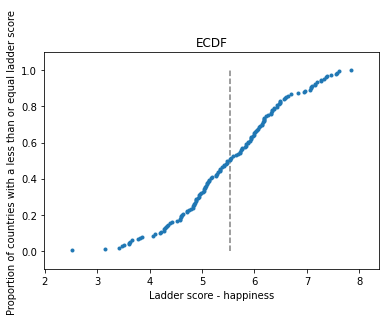

In [24]:
#compute and plot the ECDF for the Ladder Score
x_2021, y_2021 = ecdf(df_2021["Ladder score"])


_ = plt.plot(x_2021, y_2021, marker='.', linestyle='none')
_ = plt.margins(0.1)

_ = plt.title('ECDF')
_ = plt.xlabel('Ladder score - happiness')
_ = plt.ylabel('Proportion of countries with a less than or equal ladder score ')
_ = plt.vlines(5.53, 0.0, 1.0, "grey", linestyles="dashed")

- First of all, we can see the function is fairly evenly distributed with values ranging from 2.5 up to almost 8. Given this is a world happiness index it confirms there are large differences among the countries. 
- While the mean score for Western Europe is almost 7, around 50% of countries reach a score below 5.5 (looking at the vertical line showing the mean)
- Additionally, there are some countries with a very low score, in fact roughly 10% of all the countries in the world score below 4. 
- Interestingly there seems to be a bit of a gap between the number of countries scoring just under 7 and above 7.

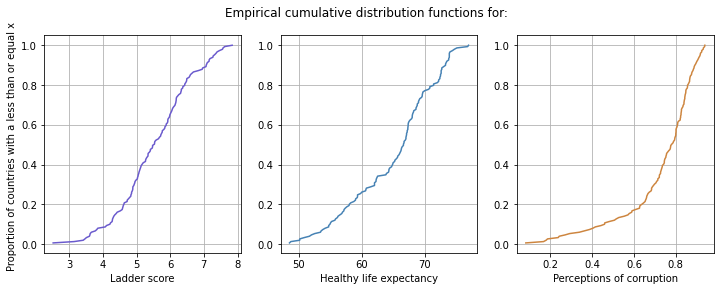

In [25]:
#compute and plot the ECDF for the following variables
three_ecdf_chart(df_2021["Ladder score"], df_2021["Healthy life expectancy"], df_2021["Perceptions of corruption"])

**Healthy life expectancy:**
Life expectancy ranges from around 50 years to over 70. In fact, only 20% of population can expect to live over 70 years, whereas 20% of people will see less than 60 years of life. 

**Freedom to make life choices:**
It seems that around 20% of population tends to have very little freedom to make life choices, however, after that point the curve shifts quickly.

**Perception of corruption:**
According to Investopdeia, the corruption index ranks countries from zero (highly corrupt) to 100 (clean) - with that in mind, the majority of countries (80%) are leaning more towards right (being less corrupt), however, almost 20% of countries seem to score under 0.6.

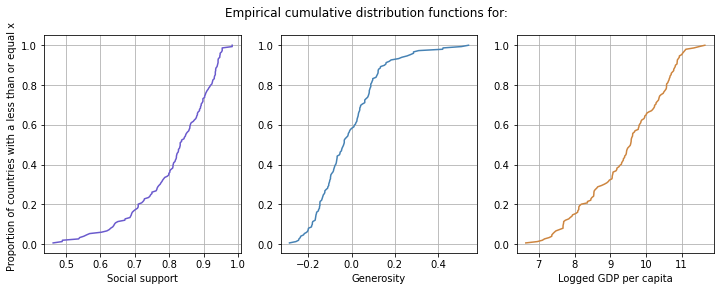

In [26]:
#compute and plot the ECDF for the following variables
three_ecdf_chart(df_2021["Social support"], df_2021["Generosity"], df_2021["Logged GDP per capita"])

**Social support:**
Life expectancy ranges from around 50 years to over 70. In fact, only 20% of population can expect to live over 70 years, whereas 20% of people will see less than 60 years of life. 

**Generosity:**
It seems that around 20% of population tends to have very little freedom to make life choices, however, after that point the curve shifts quickly.

**Logged GDP per capita:**
According to Investopdeia, the corruption index ranks countries from zero (highly corrupt) to 100 (clean) - with that in mind, the majority of countries (80%) are leaning more towards right (being less corrupt), however, almost 20% of countries seem to score under 0.6.

## 3. Regression analysis

### 3.1 Simple linear regression

In the ECDF section, we saw that around 20% of the countries tend to fall on a more corrupt side in terms of perception. While the percentage seems relatively small, we'd like to understand how much does it actually impact the overall happiness index if at all. Therefore, a regression analysis will be performed, trying to answer the following questions:

- Is there a relationship between the predictor/feature (Perception of corruption) and the response/target variable (Ladder score)?
- How strong is the relationship between the predictor and the response?
- Is the relationship between the predictor and the response negative or positive?
- What is the predicted Ladder score associated with a 0.1 increase of the Perception of corruption? What are the associated 95% confidence intervals and prediction intervals?

#### Scatter plot and the relationship

In [27]:
#extract the column of the Ladder score and Perception of corruption
ladder_score=df_2021["Ladder score"]
corruption=df_2021["Perceptions of corruption"]

In [28]:
#check the type of the variables
type(ladder_score)
type(corruption)

pandas.core.series.Series

Before we fit the linear regression, we need to create feature and target variable arrays, by reshaping the current pandas series types.

In [29]:
#create arrays for predictor and response variables
ladder_array=ladder_score.values
corruption_array=corruption.values

In [30]:
#reshape by adding a second dimension to the arrays to ensure the right format for scikit-learn model building
y_ladder=ladder_array.reshape(-1,1)
X_corruption=corruption_array.reshape(-1,1)

Text(0.5, 1.0, 'Relationship between the Ladder Score and Corruption')

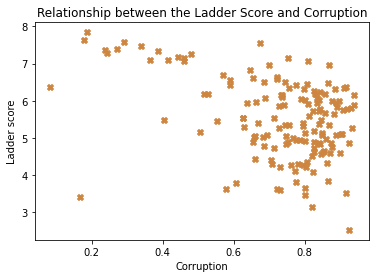

In [31]:
#plot the ladder score as a function of the perception of corruption
plt.scatter(X_corruption, y_ladder, marker="X", color="peru")
plt.ylabel("Ladder score")
plt.xlabel("Corruption")
plt.title("Relationship between the Ladder Score and Corruption")

There seems to be some relationship between the two variables, in fact a negative one, where a in some cases a lower perception of corruption is associated with a higher Ladder score and vice versa - higher corrpution leading to lower ladder score.

Let's measure the actual correlation through the Pearson coefficient.

In [32]:
#perason correlation coefficient
ladderscore_corruption_pcoeff=np.corrcoef(corruption, ladder_score)[0,1]
print("The correlation coefficient between the two variables is:", round(ladderscore_corruption_pcoeff, 2))

The correlation coefficient between the two variables is: -0.42


Given the negative correlation between the two variables, let's measure and quantify the impact of the Corruption on the Happiness Ladder score by fitting the regression model.

#### Fitting the linear regression model

In [33]:
#instantiate the LinearRegression as reg, fit the regression to the variables
reg=LinearRegression()
reg.fit(X_corruption, y_ladder)
#check the regressors predictions of the range of data
prediction_space=np.linspace(min(X_corruption), max(X_corruption)).reshape(-1,1)

Text(0.5, 1.0, 'Linear regression model')

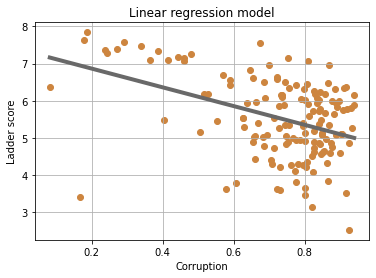

In [34]:
#plot the liner regression line over the scatter plot
plt.scatter(X_corruption, y_ladder, color="peru")
plt.plot(prediction_space, reg.predict(prediction_space), color="dimgrey", linewidth=4)
plt.grid()
plt.xlabel("Corruption")
plt.ylabel("Ladder score")
plt.title("Linear regression model")

#### R square score & coefficients

In [35]:
#calculate the R^2 score to explain the varience of the model
r_square=reg.score(X_corruption, y_ladder)
print("R square score is:", round(r_square, 3))

R square score is: 0.177


Turns out that only 18% of variability of the Ladder score is explained by the Perceptions of corruption in a specific country.

In [36]:
#slope and intercept
slope, intercept = np.polyfit(ladder_array, corruption_array, 1)

In [37]:
print("The slope is:", slope)
print("The intercept is:", intercept)

The slope is: -0.07028374630064846
The intercept is: 1.1163183118391307


With the slope of -0.07 it means that with every additional unit of Perception of corruption in the country, the Ladder score decreases for only 0.07 points, which is a relatively small impact.

### Multiple linear regression

Questions to answer:

- Produce a scatter plot matrix which includes all the variables
- Compute the matrix correlations between the variables
- Perform the multiple linear regression function to find out:
    - Is there a relationship between the predictors and the response
    - Which predictors appear to have statistically significant relationship to the response?
- Plot the function to produce diagnostic plot of the linear regression fit and comment on any problems.
     - Do the residual plots suggest any unusually large outliers?
- Fit multiple regression model to predict Ladder score using the indpedent variables from Part 1
- Provide interpretation of each coefficient of the model
- For which predictors can you reject the null hypothesis H0: beta=0
     - If there is no evidence of associatation, leave out the predictor and re-fit the model

Running the regression model on the float variables

In [38]:
#choose only float type columns and create a new dataframe
df_2=df_2021[["Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices","Generosity", "Perceptions of corruption"]]

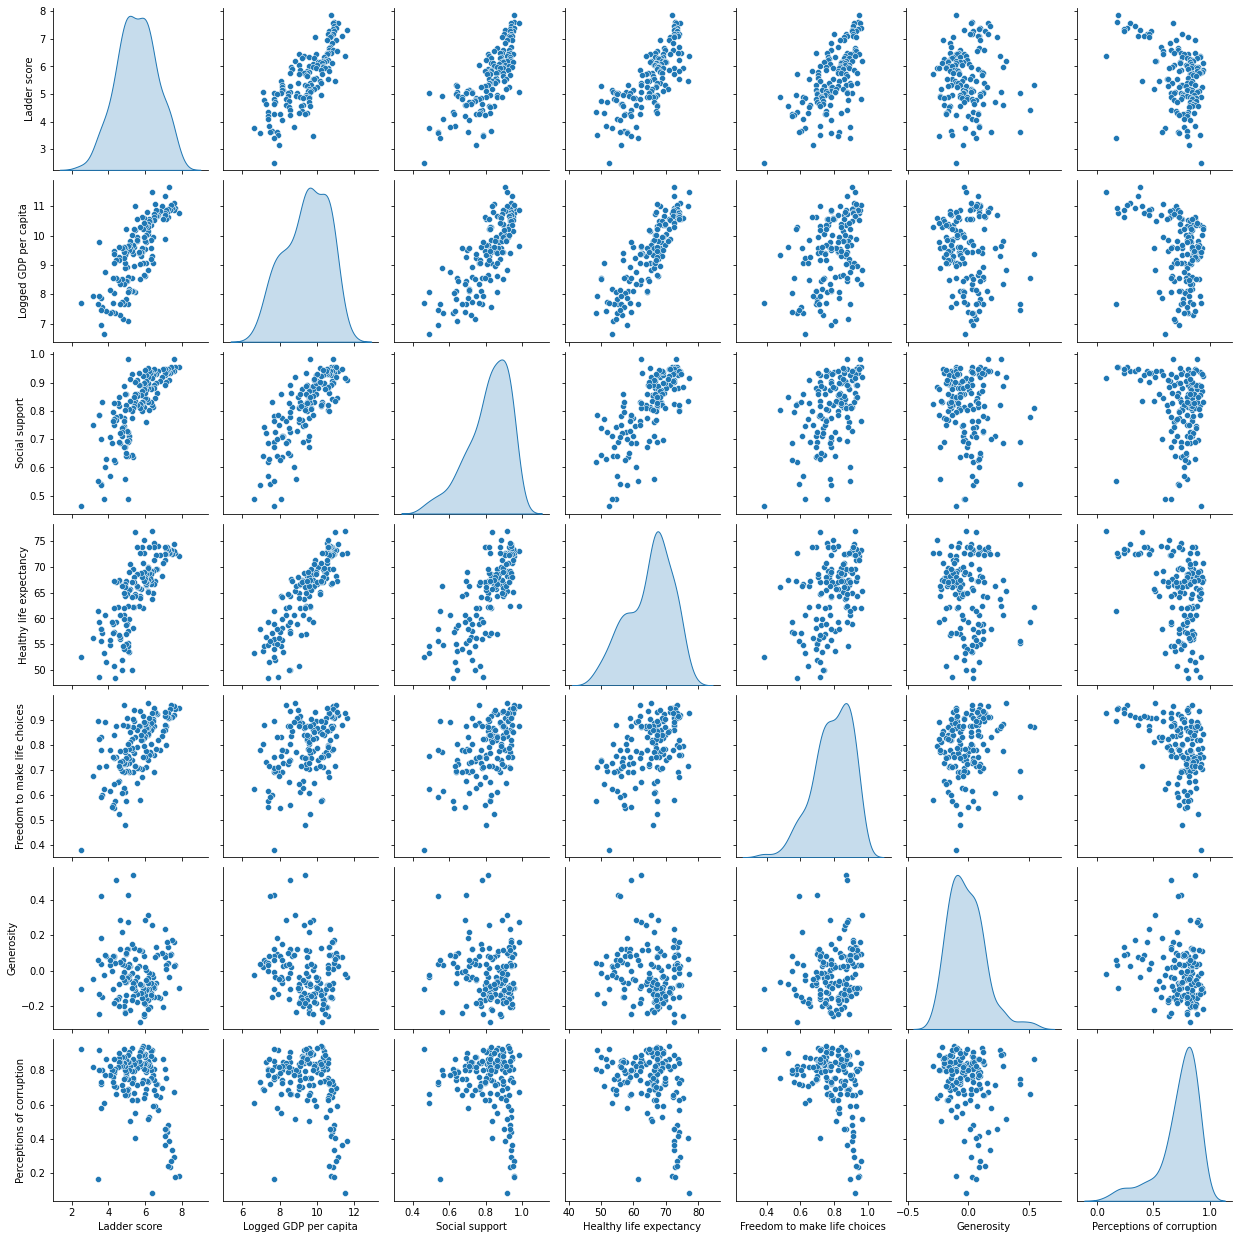

In [39]:
#scatterplot matrix to assess pairwise relationship between the variables
sns.pairplot(df_2, diag_kind="kde")

Observations:

    1. Most of the distributions are slighly skewed in either way.
    2.There seems to be a strong relationship between the Ladder score, Logged GDP per capita, Social support and healthy life expectancy.

<AxesSubplot:>

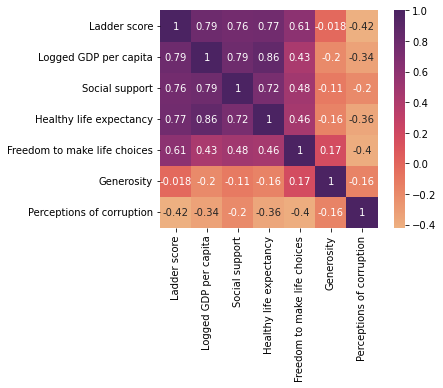

In [40]:
#create a heatmap and quantify the pairwise correlation between the variables
sns.heatmap(df_2.corr(), square=True, cmap="flare", annot=True)

As already observed in the scatter plot matrix, the top left corner (with the variables covering Ladder Score, Logged GDP per capita, Social Support, Healthy life expectacny) shows a much stronger correlation between these variables, while Generosity and Pereceptions of corrpution seem to be less corelated with other variables.

In [41]:
#create the arrays for feature (X) and target variable (y)
X=df_2.drop(columns="Ladder score").values
y=ladder_score.values

In [42]:
#create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
#set the regressor: reg_all
reg_all=LinearRegression()

In [44]:
#fit the regressor to the training data
reg_all.fit(X_train, y_train)

LinearRegression()

In [45]:
#predict the y based on the test data
y_pred=reg_all.predict(X_test)

In [46]:
#compute the R^2 and RMSE (Root Mean Squared Error) to evaluate the regression model
r2=reg_all.score(X_test, y_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))

In [47]:
print("R^2 is", r2)
print("Root Mean Squared Error is", rmse)

R^2 is 0.6735746331507252
Root Mean Squared Error is 0.5864835450880723


With the R^2=0.67, the model has improved (comparing to 0.177 in the simple linear regression one) and explains 67% of the variance in the Ladder score. 

#### k-fold cross-validation

Given we've split the data, the computed R^2 might not be representative of the model's ability to generalise to the unseen data. To avoid the dependance of the arbitrary split, a cross-validation technique will be used to further assess the model.

In [55]:
from sklearn.metrics import mean_squared_error, make_scorer

In [59]:
#load the mean squared error method and the function for creating a scorer
mse = make_scorer(mean_squared_error)

In [57]:
#5-fold cross validation to evaluate the model by maximising the amout of data being used
cv_scores=cross_val_score(reg_all, X, y, cv=5, scoring=mse)

In [58]:
#show the average score for the 5-cross validation
print("Avarage 5-fold cross validation score is", np.mean(cv_scores))

Avarage 5-fold cross validation score is 0.5568686237049082


In [60]:
#3-fold cross validation to evaluate the model by maximising the amout of data being used
cv_scores_3=cross_val_score(reg_all, X, y, cv=3, scoring=mse)
print(np.mean(cv_scores_3))

0.7439567212925627


In [64]:
#10-fold cross validation
cv_scores_10=cross_val_score(reg_all, X, y, cv=10, scoring=mse)
print(np.mean(cv_scores_10))

0.41923001026359474


In [63]:
#20-fold cross validation
cv_scores_20=cross_val_score(reg_all, X, y, cv=20, scoring=mse)
print(np.mean(cv_scores_20))

0.3506112040880975


We can see that the higher k-fold number we choose, the lower the mean squared error we get for the model results.

#### Ridge regularised regression

While linear regression minimised the loss function for each feature variable, the ridge regression alters the loss function coefficient by penalising the coefficients with a large magnitue through the process of regularisation.

In [51]:
#instantiate the ridge regressor
ridge=Ridge(alpha=0.1, normalize=True)

In [52]:
#train the data
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, normalize=True)

In [53]:
ridge_pred=ridge.predict(X_test)

In [54]:
ridge.score(X_test, y_test)

0.6761906845173212

The R^2 actually stay the same, since there are no extreme coefficients, so regularisation doesn't make much difference in our case.

#### Lasso regularised regression for feature selection

In the scatter plot matrix and correlation heatmap, we saw that certain variable pairs have stronger relationship than others, however, we'd like to find out which coefficient of the multiple regression model are the most important, while shrinking the less important coefficients. 

In [55]:
#instantiate the lasso regressor
lasso=Lasso(alpha=0.2, normalize=True)

In [56]:
#fit the regressor to the data
lasso.fit(X, y)

Lasso(alpha=0.2, normalize=True)

In [57]:
#extract the coeff attribute and store in lasso coef
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

[ 0.  0.  0.  0. -0. -0.]


In [58]:
df_3=df_2.drop(columns="Ladder score")

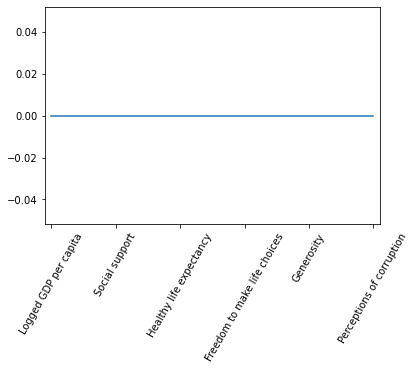

In [59]:
# Plot the coefficients
plt.plot(range(len(df_3.columns)), lasso_coef)
plt.xticks(range(len(df_3.columns)), df_3.columns, rotation=60)
plt.margins(0.02)
plt.show()

Again, none of the coefficients are extreme enough to stand out from the rest, so Lasso regularisation hasn't made any difference here.

#### Conclusion

Testing the simple and multiple linear regression models, the latter proved much more effective, allowing us to explain 67% of Ladder Score variability by the independent variables. 

After trying the ridge and lasso regression, none of these proved effective due to low number and not extreme variability in the coefficients. 

Nevertheless, each variable contained only 149 measures, so a larger dataset would be required to produce a model with more accurate predictions of country happiness score based on the given set of independent variables. 

